In [15]:
import numpy as np
import pandas as pd

In [16]:
df = pd.read_csv('Iris.csv')

In [17]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [18]:
df = df.iloc[:,1:]

In [19]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
encoder = LabelEncoder()

In [22]:
df['Species'] = encoder.fit_transform(df['Species'])

In [23]:
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [24]:
df = df[df['Species'] != 0][['SepalWidthCm','PetalLengthCm','Species']]

In [25]:
df.head()

,SepalWidthCm,PetalLengthCm,Species
50,3.2,4.7,1
51,3.2,4.5,1
52,3.1,4.9,1
53,2.3,4.0,1
54,2.8,4.6,1


In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

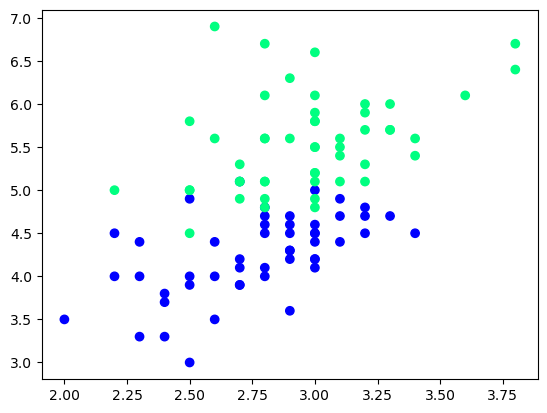

In [27]:
plt.scatter(df['SepalWidthCm'],df['PetalLengthCm'],c=df['Species'],cmap='winter')


In [28]:
df_train = df.iloc[:60,:].sample(10)
df_train

,SepalWidthCm,PetalLengthCm,Species
87,2.3,4.4,1
82,2.7,3.9,1
78,2.9,4.5,1
103,2.9,5.6,2
63,2.9,4.7,1
56,3.3,4.7,1
60,2.0,3.5,1
86,3.1,4.7,1
59,2.7,3.9,1
51,3.2,4.5,1


In [29]:
# Taking only 10 rows for training and 5 validation and 5 test
df = df.sample(100)
df_train = df.iloc[:60,:].sample(10)
df_val = df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [31]:
df_train

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
75,3.0,4.4,1
118,2.6,6.9,2
80,2.4,3.8,1
97,2.9,4.3,1
108,2.5,5.8,2
78,2.9,4.5,1
104,3.0,5.8,2
113,2.5,5.0,2
93,2.3,3.3,1


In [32]:
df_val

,SepalWidthCm,PetalLengthCm,Species
86,3.1,4.7,1
106,2.5,4.5,2
57,2.4,3.3,1
51,3.2,4.5,1
111,2.7,5.3,2


In [33]:
df_test

,SepalWidthCm,PetalLengthCm,Species
127,3.0,4.9,2
53,2.3,4.0,1
140,3.1,5.6,2
83,2.7,5.1,1
126,2.8,4.8,2


In [34]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

In [35]:
y_test

array([1, 2, 1, 1, 2])

## CASE 1 - Bagging

In [36]:
# Data for Tree 1
df_bag = df_train.sample(8,replace=True)

X = df_bag.iloc[:,0:2]
y= df_bag.iloc[:,-1]

df_bag

,SepalWidthCm,PetalLengthCm,Species
75,3.0,4.4,1
97,2.9,4.3,1
78,2.9,4.5,1
78,2.9,4.5,1
93,2.3,3.3,1
118,2.6,6.9,2
75,3.0,4.4,1
104,3.0,5.8,2


In [37]:
X

,SepalWidthCm,PetalLengthCm
75,3.0,4.4
97,2.9,4.3
78,2.9,4.5
78,2.9,4.5
93,2.3,3.3
118,2.6,6.9
75,3.0,4.4
104,3.0,5.8


In [41]:

from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [43]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values,y.values,clf=clf,legend=2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

In [42]:
dt_bag1 = DecisionTreeClassifier()

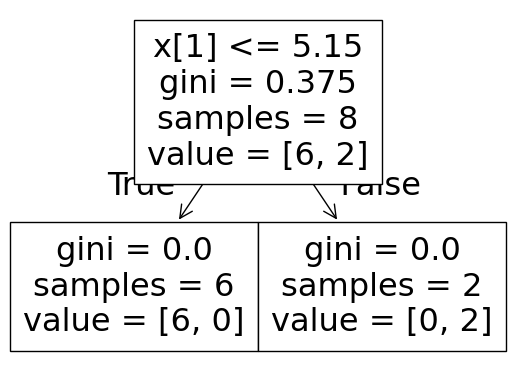

C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


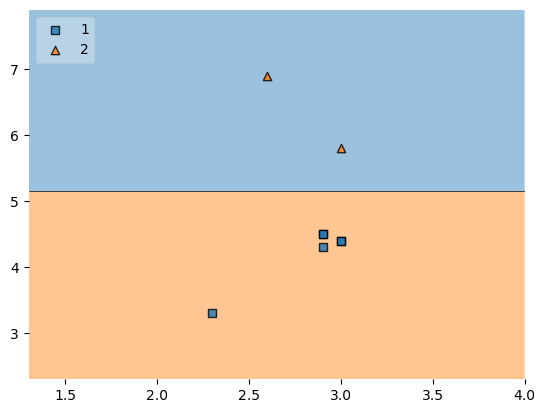

In [44]:
evaluate(dt_bag1,X,y)

In [45]:

# Data for Tree 2
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
75,3.0,4.4,1
97,2.9,4.3,1
118,2.6,6.9,2
80,2.4,3.8,1
124,3.3,5.7,2
78,2.9,4.5,1
113,2.5,5.0,2


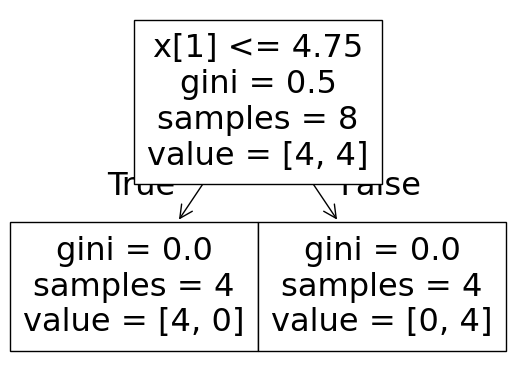

0.8


C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


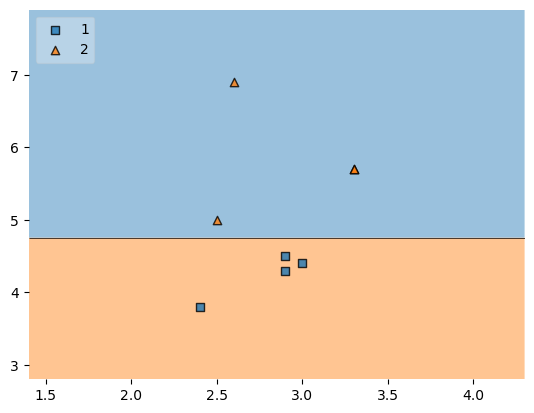

In [48]:
dt_bag2 = DecisionTreeClassifier()
evaluate(dt_bag2,X,y)

In [49]:

# Data for Tree 3
df_bag = df_train.sample(8,replace=True)

# Fetch X and y
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

# print df_bag
df_bag

,SepalWidthCm,PetalLengthCm,Species
97,2.9,4.3,1
93,2.3,3.3,1
75,3.0,4.4,1
113,2.5,5.0,2
124,3.3,5.7,2
93,2.3,3.3,1
80,2.4,3.8,1
113,2.5,5.0,2


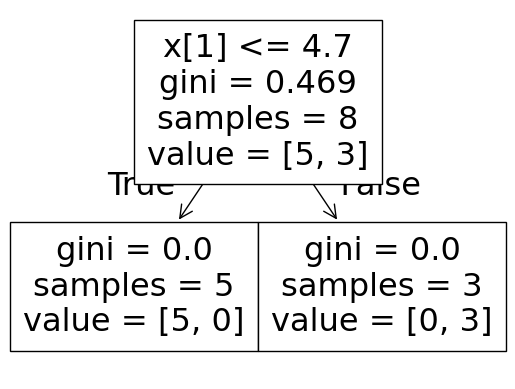

C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


0.8


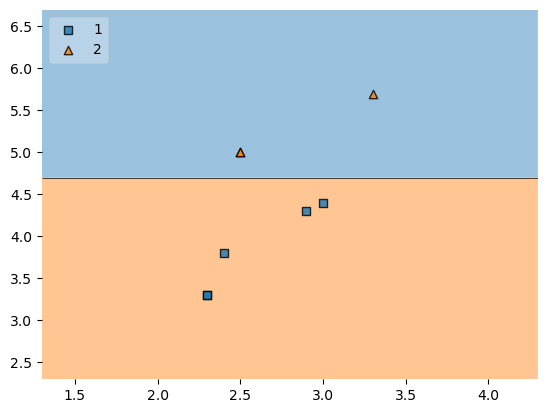

In [50]:

dt_bag3 = DecisionTreeClassifier()
evaluate(dt_bag3,X,y)

## Predict

In [51]:
df_test

,SepalWidthCm,PetalLengthCm,Species
127,3.0,4.9,2
53,2.3,4.0,1
140,3.1,5.6,2
83,2.7,5.1,1
126,2.8,4.8,2


In [54]:

print("Predictor 1",dt_bag1.predict(np.array([3.0,4.9]).reshape(1,2)))
print("Predictor 2",dt_bag2.predict(np.array([3.0,4.9]).reshape(1,2)))
print("Predictor 3",dt_bag3.predict(np.array([3.0,4.9]).reshape(1,2)))

Predictor 1 [1]
Predictor 2 [2]
Predictor 3 [2]


C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Pratyush\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


## Pasting

In [55]:
# Row Sampling without replacement

In [56]:
df_train

,SepalWidthCm,PetalLengthCm,Species
124,3.3,5.7,2
75,3.0,4.4,1
118,2.6,6.9,2
80,2.4,3.8,1
97,2.9,4.3,1
108,2.5,5.8,2
78,2.9,4.5,1
104,3.0,5.8,2
113,2.5,5.0,2
93,2.3,3.3,1


In [57]:
df.sample(8)

,SepalWidthCm,PetalLengthCm,Species
132,2.8,5.6,2
89,2.5,4.0,1
149,3.0,5.1,2
93,2.3,3.3,1
115,3.2,5.3,2
88,3.0,4.1,1
101,2.7,5.1,2
145,3.0,5.2,2


## Random Subspaces

In [58]:
df1 = pd.read_csv('Iris.csv')
df1 = df1.sample(10)

In [59]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
128,129,6.4,2.8,5.6,2.1,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [60]:
df1.sample(2,replace=True,axis=1)

,PetalWidthCm,Species
79,1.0,Iris-versicolor
39,0.2,Iris-setosa
6,0.3,Iris-setosa
103,1.8,Iris-virginica
132,2.2,Iris-virginica
90,1.2,Iris-versicolor
128,2.1,Iris-virginica
78,1.5,Iris-versicolor
54,1.5,Iris-versicolor
33,0.2,Iris-setosa


## Random Patches

In [61]:
df1

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
79,80,5.7,2.6,3.5,1.0,Iris-versicolor
39,40,5.1,3.4,1.5,0.2,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
103,104,6.3,2.9,5.6,1.8,Iris-virginica
132,133,6.4,2.8,5.6,2.2,Iris-virginica
90,91,5.5,2.6,4.4,1.2,Iris-versicolor
128,129,6.4,2.8,5.6,2.1,Iris-virginica
78,79,6.0,2.9,4.5,1.5,Iris-versicolor
54,55,6.5,2.8,4.6,1.5,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa


In [62]:
df1.sample(8,replace=True).sample(2,replace=True,axis=1)

,PetalWidthCm,SepalLengthCm
90,1.2,5.5
79,1.0,5.7
132,2.2,6.4
128,2.1,6.4
128,2.1,6.4
54,1.5,6.5
90,1.2,5.5
33,0.2,5.5
